In [8]:
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

from nmrnet import *
import nmrMod as nmr

import torch as th
import torch.nn as nn
from torch import Tensor
from torch.utils.data import DataLoader
from safetensors.torch import load_model
from torchinfo import summary

#from collections.abc import Callable
from tqdm.notebook import trange, tqdm

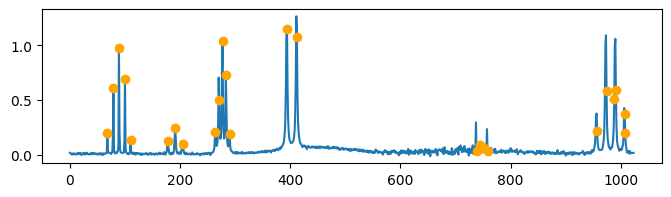

In [9]:
yy, res = nmr.generateRandomSpectrum(0)
fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(yy["filtered"])
ax.scatter(res,[yy["filtered"][i] for i in res], c = "orange", zorder = 10)

In [10]:
ML = 10000
ML_test = 500
batch_size = 1
train_set = NMRDataset(maxLen = ML, mode = "wide")
test_set = NMRDataset(maxLen = ML_test, startSeed = ML)

train_loader: DataLoader = DataLoader(
    dataset=train_set, batch_size=batch_size, shuffle=False,
    num_workers=2
)
test_loader: DataLoader = DataLoader(
    dataset=test_set,  batch_size=batch_size, shuffle=False,
    num_workers=2
)

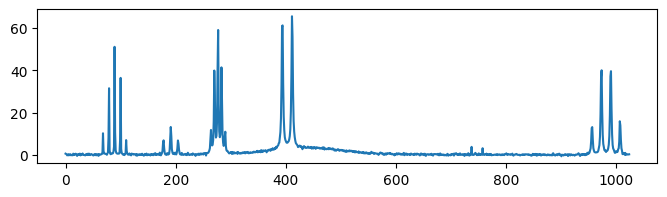

In [11]:
fig, ax = plt.subplots(figsize=(8, 2))
ax.plot(train_set[0][0].T)

In [12]:
device: th.device = th.device(
    "cuda" if th.cuda.is_available() else "cpu"
)
print(device)
model: th.nn.Module = NMRSeq().to(device)
summary(model, input_size=(batch_size,1,nmr.nPts))

cpu


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 1, 1024]              --
├─Inception_variant: 1-1                 [1, 136, 1024]            --
│    └─Inception_piece: 2-1              [1, 16, 1024]             --
│    │    └─Conv1d: 3-1                  [1, 1, 1025]              3
│    │    └─Conv1d: 3-2                  [1, 16, 1024]             48
│    └─Inception_piece: 2-2              [1, 32, 1024]             --
│    │    └─Conv1d: 3-3                  [1, 1, 1027]              5
│    │    └─Conv1d: 3-4                  [1, 32, 1024]             160
│    └─Inception_piece: 2-3              [1, 64, 1024]             --
│    │    └─Conv1d: 3-5                  [1, 1, 1031]              9
│    │    └─Conv1d: 3-6                  [1, 64, 1024]             576
│    └─Inception_piece: 2-4              [1, 16, 1024]             --
│    │    └─Conv1d: 3-7                  [1, 1, 1055]              33
│    │    └─Conv

In [13]:
lossCriterion = nn.CrossEntropyLoss()

In [14]:
load_model(model, "./pars.safetensors")

(set(), set())

In [31]:
dataiter = test_loader.__iter__()
x_a, y_a = dataiter.__next__()
QUANTO = 0
for i in range(QUANTO):
    x_a, y_a = dataiter.__next__()

In [36]:
x_a, y_a = x_a.to(device), y_a.to(device)
target = model(x_a)
k = target.detach().numpy()
sigk = th.special.expit(target).detach().numpy()

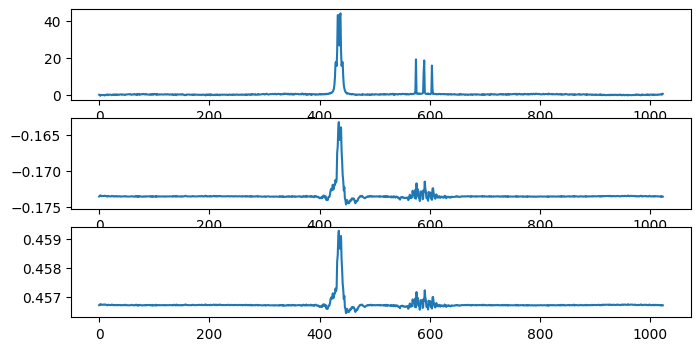

In [39]:
fig, ax = plt.subplots(3,1,figsize=(8, 4))
ax[0].plot(x_a[0][0])
ax[1].plot(k[0][0])
ax[2].plot(sigk[0][0])

In [ ]:
train_set[0][1]